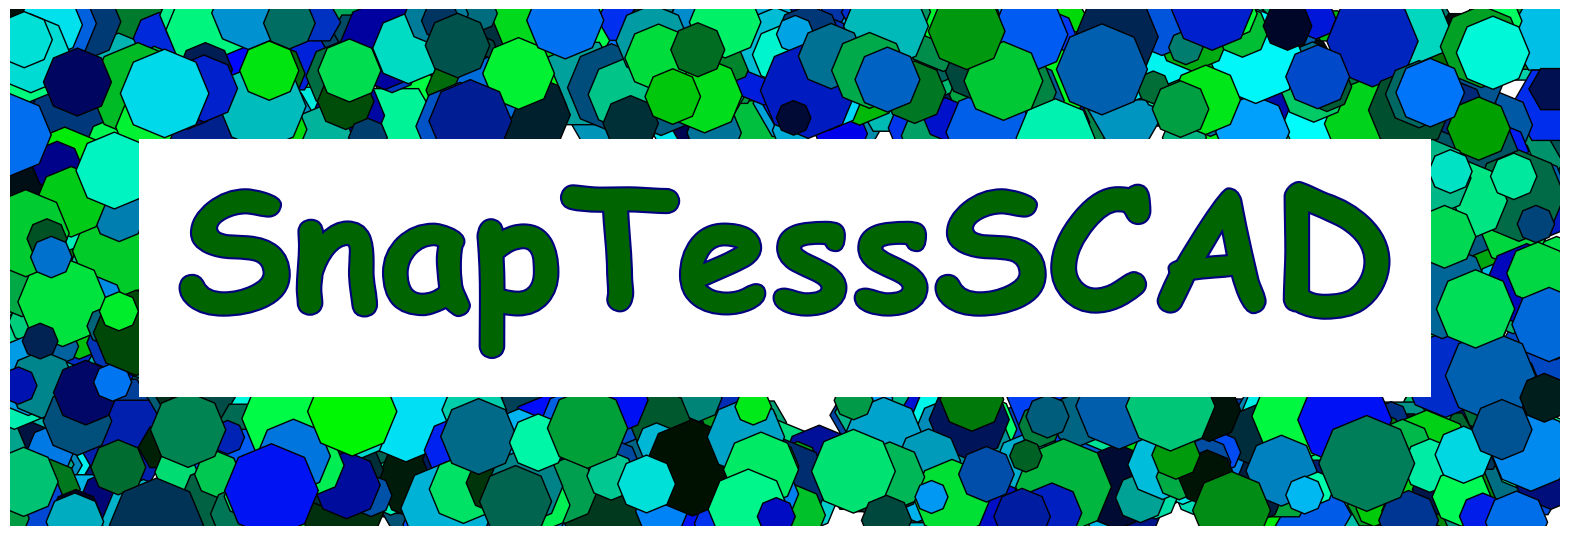

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import patheffects

def create_hexagon(center, size):
    """Generate the vertices of a regular hexagon given a center and size."""
    angle = np.linspace(0, 2 * np.pi, 7)
    x_hexagon = center[0] + size * np.cos(angle)
    y_hexagon = center[1] + size * np.sin(angle)
    return x_hexagon, y_hexagon

def create_octagon(center, size):
    """Generate the vertices of a regular octagon given a center and size."""
    angle = np.linspace(0, 2 * np.pi, 9)
    x_octagon = center[0] + size * np.cos(angle)
    y_octagon = center[1] + size * np.sin(angle)
    return x_octagon, y_octagon

def create_random_color():
    """Generate a random color in greyscale blue-green palette."""
    blue = (0, 0, 1)
    green = (0, 1, 0)
    return mcolors.to_hex(np.random.uniform(blue, green))

def plot_shape(ax, vertices, color):
    """Plot a shape on the given axes."""
    ax.fill(vertices[0], vertices[1], color=color, edgecolor='black')

def plot_random_shapes(ax, shape_count, shape_func, size_range, color_func, exclusion_zone):
    """
    Plot random shapes on the axis, avoiding the exclusion zone.
    """
    for _ in range(shape_count):
        while True:
            random_x = np.random.uniform(0, cols * 2)
            random_y = np.random.uniform(0, rows)
            if not (exclusion_zone[0] < random_x < exclusion_zone[2] and exclusion_zone[1] < random_y < exclusion_zone[3]):
                break
        random_size = np.random.uniform(size_range[0], size_range[1])
        shape_vertices = shape_func((random_x, random_y), random_size)
        plot_shape(ax, shape_vertices, color=color_func())

# Parameters for the frame
frame_edge_width = 4  # Width of the frame edges
cols = 24  # Width doubled for landscape frame
rows = 16  # Height remains the same
hexagon_count = 500  # Number of hexagons
octagon_count = 500  # Number of octagons
size_range = (0.5, 1.5)  # Size range for the shapes
exclusion_zone = (frame_edge_width, frame_edge_width, cols * 2 - frame_edge_width, rows - frame_edge_width)  # Zone for the white rectangle

font_sz = 120

# Create the figure and axis for landscape frame
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlim(0, cols * 2)
ax.set_ylim(0, rows)
ax.set_aspect('equal')
ax.axis('off')

# Plot random hexagons and octagons
plot_random_shapes(ax, hexagon_count, create_hexagon, size_range, create_random_color, exclusion_zone)
plot_random_shapes(ax, octagon_count, create_octagon, size_range, create_random_color, exclusion_zone)

# Add the white rectangle in the middle
white_rect = patches.Rectangle((exclusion_zone[0], exclusion_zone[1]), exclusion_zone[2] - exclusion_zone[0], 
                               exclusion_zone[3] - exclusion_zone[1], linewidth=1, edgecolor='none', facecolor='white')
ax.add_patch(white_rect)

# Add text in the middle of the white rectangle
text_x_center = (exclusion_zone[2] + exclusion_zone[0]) / 2
text_y_center = (exclusion_zone[3] + exclusion_zone[1]) / 2


text = ax.text(text_x_center, text_y_center, 'SnapTessSCAD', fontsize=font_sz, va='center', ha='center',
               weight='bold', color='darkgreen', fontname='Comic Sans MS')
text.set_path_effects([patheffects.withStroke(linewidth=3, foreground='navy')])

plt.show()